No handles with labels found to put in legend.


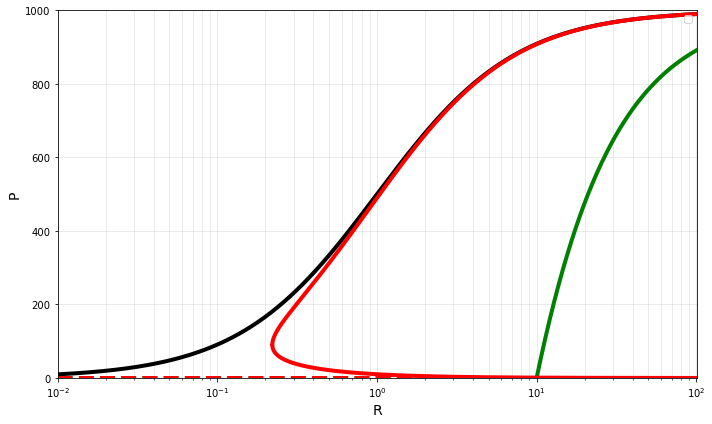

In [28]:
# Analytically computed STH hierarchy in biomolecular system models

import numpy as np
import matplotlib.pyplot as plt

alpha = 100
gamma = 1
D_T = 10
km = 100
kp = 100
km2 = 1000
kp2 = 0.1
R = np.logspace(-2, 2, 10000)

saturation = True
threshold = True
hysteresis = True

fig, ax = plt.subplots(figsize=(10, 6))

# Saturation
if saturation:
    P = (alpha/gamma) * D_T * R / (R + km/kp)
    ax.plot(R, P, linewidth=4, color='black')

# Threshold
if threshold:
    P_zero = np.zeros_like(R)
    ax.plot(R, P_zero, linewidth=4, color='green', linestyle='--')
    P = ((alpha/gamma) * D_T * R - (km*km2)/(kp*kp2)) / (R + km/kp)
    ax.plot(R, P, linewidth=4, color='green')

# Hysteresis
if hysteresis:
    c1 = km/kp
    c2 = (km*km2)/(kp*kp2)
    b = -(alpha/gamma) * D_T * R / (R + c1)
    c = c2 / (R + c1)
    
    P_zero = np.zeros_like(R)
    ax.plot(R, P_zero, linewidth=4, color='red', linestyle='--')
    
# Finding where discriminant becomes positive
    discriminant = b**2 - 4*c
    positive_mask = discriminant > 0
    
    if np.any(positive_mask):
        first = np.argmax(positive_mask)  # First True index
        R_subset = R[first:]
        b_subset = b[first:]
        c_subset = c[first:]
        disc_subset = discriminant[first:]
        
        P1 = (-b_subset + np.sqrt(disc_subset)) / 2
        P2 = (-b_subset - np.sqrt(disc_subset)) / 2
        
        ax.plot(R_subset, P1, linewidth=4, color='red')
        ax.plot(R_subset, P2, linewidth=4, color='red')

# Plotting (log scale on x-axis)
ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(0, 1000)
ax.set_xlabel('R', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.grid(True, alpha=0.3, which='both')
if saturation or threshold or hysteresis:
    ax.legend()
# ax.set_title('Saturation-Threshold-Hysteresis Hierarchy in Biomolecular Systems')
plt.tight_layout()
plt.show()
# plt.savefig('plt.png')

In [9]:
# # GB computation for saturation (Model S)

# # Defining the polynomial ring and variables
# R = PolynomialRing(QQ, 'DU,DR,P,D,R,kplus,kminus,alpha,gamma', order='lex')
# DU, DR, P, D, Rp, kplus, kminus, alpha, gamma = R.gens()

# D = 10 
# kplus = 100 
# kminus = 100 
# alpha  = 100 
# gamma = 1
# # R = 10

# # Define the polynomial equations
# f1 = DU + DR - D                             # DNA conservation
# f2 = kplus*Rp*DU - kminus*DR                 # Binding equilibrium
# f3 = alpha*DR - gamma*P                      # Protein steady-state

# #  ideal construction
# I = R.ideal(f1, f2, f3)

# # Computing the Groebner basis
# G = I.groebner_basis()
# show(G)
# print(G)

In [29]:
# Model S (Saturation model)

# Defining polynomial ring and variables
R = PolynomialRing(QQ, 'DU,DR,P,D,Rp,kplus,kminus,alpha,gamma', order='lex')
DU, DR, P, D, Rp, kplus, kminus, alpha, gamma = R.gens()

f1 = DU + DR - D                    # DNA conservation
f2 = kplus*Rp*DU - kminus*DR        # Binding equilibrium
f3 = alpha*DR - gamma*P             # Protein steady-state

# Constructing ideal
I = R.ideal(f1, f2, f3)

# Computing Basis
G = I.groebner_basis()
# show(G)
print("Groebner basis:")
for g in G:
    print(g)

# Eliminating DU and DR for getting the relation involving P

I_elim = I.elimination_ideal([DU, DR])
G_elim = I_elim.groebner_basis()
print("\nElimination Groebner basis (in P, D, Rp, kplus, kminus, alpha, gamma):")
for g in G_elim:
    print(g)

# Now solving the equations symbolically 
var('DU, DR, P, D, Rp, kplus, kminus, alpha, gamma')
f1s = DU + DR - D
f2s = kplus*Rp*DU - kminus*DR
f3s = alpha*DR - gamma*P
sol = solve([f1s, f2s, f3s], [DU, DR, P], solution_dict=True)

print("\nSymbolic solution:")
show(sol[0])

# Extracting the expression for P
P_expr = sol[0][P].simplify_full()
print("\nSimplified expression for P:")
show(P_expr)

# Substituting numeric parameters for getting protein expression in terms of parameters:
P_numeric = P_expr.subs({D:10, kplus:100, kminus:100, alpha:100, gamma:1})
print("\nSimplified numeric expression (with given parameters):")
show(P_numeric)

Groebner basis:
DU + DR - D
DR*Rp*kplus + DR*kminus - D*Rp*kplus
DR*alpha - P*gamma
P*Rp*kplus*gamma + P*kminus*gamma - D*Rp*kplus*alpha

Elimination Groebner basis (in P, D, Rp, kplus, kminus, alpha, gamma):
P*Rp*kplus*gamma + P*kminus*gamma - D*Rp*kplus*alpha

Symbolic solution:


{DU: D*kminus/(Rp*kplus + kminus),
 DR: D*Rp*kplus/(Rp*kplus + kminus),
 P: D*Rp*alpha*kplus/(Rp*gamma*kplus + gamma*kminus)}


Simplified expression for P:


D*Rp*alpha*kplus/(Rp*gamma*kplus + gamma*kminus)


Simplified numeric expression (with given parameters):


1000*Rp/(Rp + 1)

In [12]:
# # Threshold

# # Define the polynomial ring and variables
# R = PolynomialRing(QQ, 'DU,DP,DPR,P,D,R,kplus,kminus,alpha,gamma', order='lex')
# DU, DP, DPR, P, D, Rp, kplus, kminus, alpha, gamma = R.gens()

# # Parameters
# D = 10 
# kplus = 100 
# kminus = 100 
# alpha  = 100 
# gamma = 1
# # R = 10
# ktwoplus = 0.1
# ktwominus = 1000

# # Define the equations (steady-state conditions)
# f1 = DU + DP + DPR - D                               
# f2 = kplus*P*DU - kminus*DP 
# f3 = ktwoplus*Rp*DP - ktwominus*DPR 
# f4 = alpha*DPR - gamma*P                        


# # Construct the ideal
# I = R.ideal(f1, f2, f3, f4)

# # Compute the Groebner basis
# G = I.groebner_basis()
# show(G)
# print(G)

In [30]:
# Model T (Threshold model)

# Defining polynomial ring and symbolic variables
R = PolynomialRing(QQ, 'DU,DP,DPR,P,D,Rp,kplus,kminus,ktwoplus,ktwominus,alpha,gamma', order='lex')
DU, DP, DPR, P, D, Rp, kplus, kminus, ktwoplus, ktwominus, alpha, gamma = R.gens()

f1 = DU + DP + DPR - D
f2 = kplus*P*DU - kminus*DP
f3 = ktwoplus*Rp*DP - ktwominus*DPR
f4 = alpha*DPR - gamma*P

# Groebner basis computations
I = R.ideal(f1, f2, f3, f4)
G = I.groebner_basis()

print("Groebner basis:")
for g in G:
    print(g)

# Eliminating DU, DP, DPR
I_elim = I.elimination_ideal([DU, DP, DPR])
G_elim = I_elim.groebner_basis()
print("\nElimination Groebner basis (relations in P, D, Rp, kplus, kminus, ktwoplus, ktwominus, alpha, gamma):")
for g in G_elim:
    print(g)

# Solving symbolically using symbolic 
#    Using sage 'var' to get symbolic expressions suitable for solve()
var('DU_sym DP_sym DPR_sym P_sym D_sym Rp_sym kplus_sym kminus_sym ktwoplus_sym ktwominus_sym alpha_sym gamma_sym')

f1s = DU_sym + DP_sym + DPR_sym - D_sym
f2s = kplus_sym*P_sym*DU_sym - kminus_sym*DP_sym
f3s = ktwoplus_sym*Rp_sym*DP_sym - ktwominus_sym*DPR_sym
f4s = alpha_sym*DPR_sym - gamma_sym*P_sym

sols = solve([f1s, f2s, f3s, f4s], [DU_sym, DP_sym, DPR_sym, P_sym], solution_dict=True)
print("\nSymbolic solution set (may include trivial P=0):")
for s in sols:
    show(s)

# Extracting P solutions and simplify
P_solutions = []
for s in sols:
    if P_sym in s:
        Ps = s[P_sym].simplify_full()
        P_solutions.append(Ps)

print("\nExtracted P solutions (simplified):")
for ps in P_solutions:
    show(ps)

# solving for non-zero P by algebraic manipulation
a = kplus_sym / kminus_sym
b = (ktwoplus_sym * Rp_sym) / ktwominus_sym
P_nonzero = ( (alpha_sym/gamma_sym) * a * b * D_sym - 1 ) / ( a * (1 + b) )
print("\nAlternative compact expression for non-zero P:")
show(simplify(P_nonzero))

# substituting numeric parameters and solving for P
P_example = P_nonzero.subs({D_sym:10, kplus_sym:100, kminus_sym:100, ktwoplus_sym:50, ktwominus_sym:200, alpha_sym:100, gamma_sym:1})
show(P_example)

Groebner basis:
DU + DP + DPR - D
DP*P*kplus + DP*kminus + DPR*P*kplus - P*D*kplus
DP*Rp*ktwoplus - DPR*ktwominus
DPR*P*Rp*kplus*ktwoplus + DPR*P*kplus*ktwominus + DPR*kminus*ktwominus - P*D*Rp*kplus*ktwoplus
DPR*alpha - P*gamma
P^2*Rp*kplus*ktwoplus*gamma + P^2*kplus*ktwominus*gamma - P*D*Rp*kplus*ktwoplus*alpha + P*kminus*ktwominus*gamma

Elimination Groebner basis (relations in P, D, Rp, kplus, kminus, ktwoplus, ktwominus, alpha, gamma):
P^2*Rp*kplus*ktwoplus*gamma + P^2*kplus*ktwominus*gamma - P*D*Rp*kplus*ktwoplus*alpha + P*kminus*ktwominus*gamma

Symbolic solution set (may include trivial P=0):


{DU_sym: D_sym, DP_sym: 0, DPR_sym: 0, P_sym: 0}

{DU_sym: gamma_sym*kminus_sym*ktwominus_sym/(Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym),
 DP_sym: (D_sym*Rp_sym*alpha_sym*kplus_sym*ktwominus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym^2)/(Rp_sym^2*alpha_sym*kplus_sym*ktwoplus_sym^2 + Rp_sym*alpha_sym*kplus_sym*ktwominus_sym*ktwoplus_sym),
 DPR_sym: (D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym)/(Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym + alpha_sym*kplus_sym*ktwominus_sym),
 P_sym: (D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym)/(Rp_sym*gamma_sym*kplus_sym*ktwoplus_sym + gamma_sym*kplus_sym*ktwominus_sym)}


Extracted P solutions (simplified):


0

(D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym - gamma_sym*kminus_sym*ktwominus_sym)/(Rp_sym*gamma_sym*kplus_sym*ktwoplus_sym + gamma_sym*kplus_sym*ktwominus_sym)


Alternative compact expression for non-zero P:


(D_sym*Rp_sym*alpha_sym*kplus_sym*ktwoplus_sym/(gamma_sym*kminus_sym*ktwominus_sym) - 1)*kminus_sym/(kplus_sym*(Rp_sym*ktwoplus_sym/ktwominus_sym + 1))

4*(250*Rp_sym - 1)/(Rp_sym + 4)

In [31]:
# Model H (Hysteresis model)

# Defining polynomial ring
R = PolynomialRing(QQ, 'DU,DP2,DP2R,P,P2,D,Rp,kplus,kminus,gamma,ktwoplus,ktwominus,kthreeplus,kthreeminus,alpha', order='lex')
DU, DP2, DP2R, P, P2, D, Rp, kplus, kminus, gamma, ktwoplus, ktwominus, kthreeplus, kthreeminus, alpha = R.gens()

f1 = DU + DP2 + DP2R - D                             
f2 = kplus*P^2 - (kminus + gamma)*P2                 
f3 = ktwominus*DP2 - ktwoplus*DU*P2                  
f4 = kthreeplus*Rp*DP2 - kthreeminus*DP2R            
f5 = alpha*DP2R - gamma*P                            

# GB Computation
I = R.ideal([f1, f2, f3, f4, f5])
G = I.groebner_basis()
# show(G)
A=len(G)
show(A)
print("Groebner basis")
for g in G:
    print(g)

# eliminating DU, DP2, DP2R, P2 to get relation for P
elim_vars = [DU, DP2, DP2R, P2]
I_elim = I.elimination_ideal(elim_vars)
G_elim = I_elim.groebner_basis()
print("\nElimination Groebner basis (in P, D, Rp, and parameters):")
for g in G_elim:
    print(g)

# Solving the original system symbolically
var('DU_s DP2_s DP2R_s P_s P2_s D_s Rp_s kplus_s kminus_s gamma_s ktwoplus_s ktwominus_s kthreeplus_s kthreeminus_s alpha_s')
f1s = DU_s + DP2_s + DP2R_s - D_s
f2s = kplus_s*P_s^2 - (kminus_s + gamma_s)*P2_s
f3s = ktwominus_s*DP2_s - ktwoplus_s*DU_s*P2_s
f4s = kthreeplus_s*Rp_s*DP2_s - kthreeminus_s*DP2R_s
f5s = alpha_s*DP2R_s - gamma_s*P_s

sol = solve([f1s, f2s, f3s, f4s, f5s], [DU_s, DP2_s, DP2R_s, P2_s, P_s], solution_dict=True)
print("\nSymbolic solutions (showing P):")
for s in sol:
    show(s)            

# extracting the P solutions and simplify
P_sols = []
for s in sol:
    if P_s in s:
        P_sols.append(s[P_s].simplify_full())

print("\nSimplified expression(s) for P:")
for ps in P_sols:
    show(ps)

# Numeric P
params = {D_s:10, kplus_s:1.0, kminus_s:0.1, gamma_s:0.01, ktwoplus_s:1.0, ktwominus_s:0.1, kthreeplus_s:1.0, kthreeminus_s:0.1, alpha_s:100, Rp_s:1.0}
for ps in P_sols:
    print("P numeric:", ps.subs(params).simplify_full())

11

Groebner basis
DU + DP2 + DP2R - D
DP2*P2*ktwoplus + DP2*ktwominus + DP2R*P2*ktwoplus - P2*D*ktwoplus
DP2*Rp*kthreeplus - DP2R*kthreeminus
DP2R*P2*Rp*ktwoplus*kthreeplus + DP2R*P2*ktwoplus*kthreeminus + DP2R*ktwominus*kthreeminus - P2*D*Rp*ktwoplus*kthreeplus
DP2R*alpha - P*gamma
P^2*kplus - P2*kminus - P2*gamma
P*P2*D*Rp*kplus*ktwoplus*kthreeplus*alpha - P2^2*Rp*kminus*gamma*ktwoplus*kthreeplus - P2^2*Rp*gamma^2*ktwoplus*kthreeplus - P2^2*kminus*gamma*ktwoplus*kthreeminus - P2^2*gamma^2*ktwoplus*kthreeminus - P2*kminus*gamma*ktwominus*kthreeminus - P2*gamma^2*ktwominus*kthreeminus
P*P2*D*kplus*gamma*ktwoplus*kthreeminus*alpha + P*D*kplus*gamma*ktwominus*kthreeminus*alpha + P2^2*Rp*kminus*gamma^2*ktwoplus*kthreeplus + P2^2*Rp*gamma^3*ktwoplus*kthreeplus + P2^2*kminus*gamma^2*ktwoplus*kthreeminus + P2^2*gamma^3*ktwoplus*kthreeminus - P2*D^2*Rp*kplus*ktwoplus*kthreeplus*alpha^2 + P2*kminus*gamma^2*ktwominus*kthreeminus + P2*gamma^3*ktwominus*kthreeminus
P*P2*Rp*gamma*ktwoplus*kthreeplus 

{DU_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/(Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s),
 DP2_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s)*kthreeminus_s)/((Rp_s^2*alpha_s*kplus_s*kthreeplus_s^2 + Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s)*ktwoplus_s),
 DP2R_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/((Rp_s*alpha_s*kplus_s*kthreeplus_s + alpha_s*kplus_s*kthreeminus_s)*ktwoplus_s),
 P2_s: 1/2*(D_s^2*Rp_s^2*alpha_s^2*kplus_s*kthreeplus_s^2*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s)*D_s*Rp_s*alpha_s*kthreeplus_s - 2*((gamma_s^3 + gamma_s^2*kminus_s)*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kthreeminus_s*kthreeplus_s)*ktwominus_s)/(((gamma_s^3 + gamma_s^2*kminus_s)*kthreeminus_s^2 + 2*(Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kthreeminus_s*kthreeplus_s + (Rp_s^2*gamma_s^3 + Rp_s^2*gamma_s^2*kminus_s)*kthreeplus_s^2)*ktwoplus_s),
 P_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)}

{DU_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/(Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s),
 DP2_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s)*kthreeminus_s)/((Rp_s^2*alpha_s*kplus_s*kthreeplus_s^2 + Rp_s*alpha_s*kplus_s*kthreeminus_s*kthreeplus_s)*ktwoplus_s),
 DP2R_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/((Rp_s*alpha_s*kplus_s*kthreeplus_s + alpha_s*kplus_s*kthreeminus_s)*ktwoplus_s),
 P2_s: 1/2*(D_s^2*Rp_s^2*alpha_s^2*kplus_s*kthreeplus_s^2*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s)*D_s*Rp_s*alpha_s*kthreeplus_s - 2*((gamma_s^3 + gamma_s^2*kminus_s)*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kthreeminus_s*kthreeplus_s)*ktwominus_s)/(((gamma_s^3 + gamma_s^2*kminus_s)*kthreeminus_s^2 + 2*(Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kthreeminus_s*kthreeplus_s + (Rp_s^2*gamma_s^3 + Rp_s^2*gamma_s^2*kminus_s)*kthreeplus_s^2)*ktwoplus_s),
 P_s: 1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)}

{DU_s: D_s, DP2_s: 0, DP2R_s: 0, P2_s: 0, P_s: 0}


Simplified expression(s) for P:


1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s - sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)

1/2*(D_s*Rp_s*alpha_s*kplus_s*kthreeplus_s*ktwoplus_s + sqrt(D_s^2*Rp_s^2*alpha_s^2*kplus_s^2*kthreeplus_s^2*ktwoplus_s^2 - 4*((gamma_s^3 + gamma_s^2*kminus_s)*kplus_s*kthreeminus_s^2 + (Rp_s*gamma_s^3 + Rp_s*gamma_s^2*kminus_s)*kplus_s*kthreeminus_s*kthreeplus_s)*ktwominus_s*ktwoplus_s))/((Rp_s*gamma_s*kplus_s*kthreeplus_s + gamma_s*kplus_s*kthreeminus_s)*ktwoplus_s)

0

P numeric: 1.10017853413328e-08
P numeric: 90909.09090907993
P numeric: 0


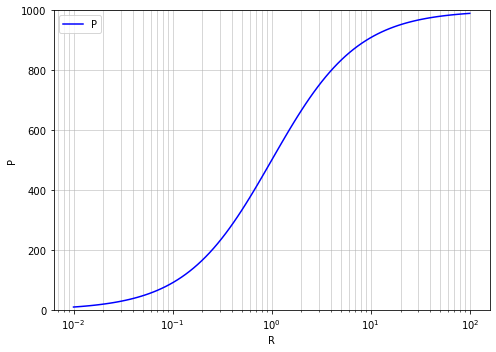

In [39]:
# Saturation with GB and plot

import numpy as np

var('x1 x2 x3')

D = 10
kplus = 100
kminus = 100
a = 100
g = 1
# ktwoplus = 0.1
# ktwominus = 1000

Rp_values = np.logspace(-2, 2, 100)  
x3_list = []

for Rp_val in Rp_values:
    R = PolynomialRing(QQ, 'x1,x2,x3', order='lex')
    x1R, x2R, x3R = R.gens()
    f1 = x1R + x2R - D
    f2 = kplus*Rp_val*x1R - kminus*x2R
    f3 = a*x2R - g*x3R
    I = R.ideal([f1, f2, f3])
    G = I.groebner_basis()

# Converting Groebner basis polynomials to symbolic expressions
    groebner_eqns = [SR(poly) for poly in G]
    
# NOw, solving the Groebner basis equations
    sol = solve(groebner_eqns, x1, x2, x3, solution_dict=True)
    
# Extracting x3 value
    if sol:
        val_x3 = RR(sol[0][x3])
        x3_list.append(val_x3 if val_x3 > 0 else float('nan'))
    else:
        x3_list.append(float('nan'))
# show(x3_list)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))

# Zero line
# P_zero = np.zeros_like(Rp_values)
# plt.plot(Rp_values, P_zero, linewidth=4, color='green', linestyle='--', label='Zero') 

plt.plot(Rp_values, x3_list, color='blue', label='P')
plt.xscale('log')           
plt.ylim(0, 1000)          
plt.xlabel('R')
plt.ylabel('P')
plt.grid(True, which="both", lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()
# show(x3_list)
# plt.savefig('plt.jpg')

Method 1: Analytically
First 10 P values: [-9891.08910891 -9890.98973666 -9890.89027465 -9890.7907228
 -9890.69108103 -9890.59134926 -9890.49152741 -9890.39161541
 -9890.29161316 -9890.1915206 ]
P at R=0.01: -9891.0891
P at R=1: -4501.2665
P at R=100: 891.0891

Method 2: Deriving from Groebner Basis
Solving system symbolically to derive formula...
P = [(a/g)*D*R - (kminus*ktwominus)/(kplus*ktwoplus)] / (R + kminus/kplus)

Method 3: Groebner Basis Numerically for sample input points
Rp=  0.01: GB=    0.00, Analytical=-9891.09, Diff=9891.0891
Rp=  1.00: GB=    0.00, Analytical=-4501.27, Diff=4501.2665
Rp= 10.00: GB=    0.00, Analytical=   -0.21, Diff=  0.2094
Rp=100.00: GB=    8.91, Analytical=  891.09, Diff=882.1782



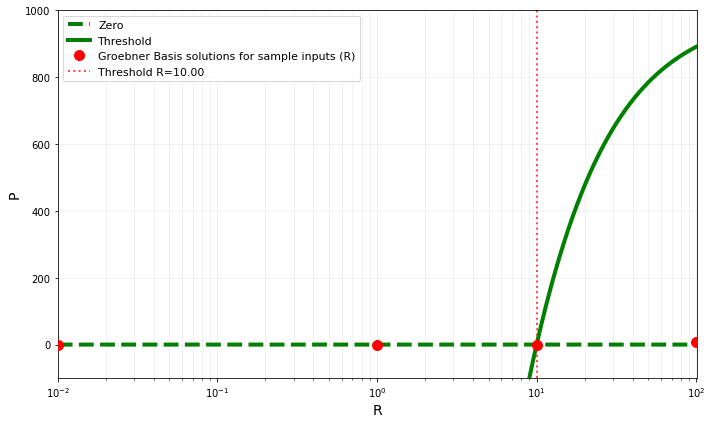

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Symbolic variables
var('x1 x2 x3 x4 Rp')

D = 10
kplus = 100
kminus = 100
a = 100
g = 1
ktwoplus = 0.1
ktwominus = 1000

# Method 1: Analytical Solution 
print("Method 1: Analytically")
print("=" * 60)

# Prepare logspaced Rp values
Rp_values = np.logspace(-2, 2, 10000)

# Direct analytical formula from threshold model this we have derived from solving the system algebraically
P_analytical = ((a/g)*D*Rp_values - (kminus*ktwominus)/(kplus*ktwoplus)) / (Rp_values + kminus/kplus)

print(f"First 10 P values: {P_analytical[:10]}")
print(f"P at R=0.01: {P_analytical[0]:.4f}")
print(f"P at R=1: {P_analytical[np.argmin(np.abs(Rp_values - 1))]:.4f}")
print(f"P at R=100: {P_analytical[-1]:.4f}")
print()

# Method 2: Deriving from Groebner Basis symbolically

print("Method 2: Deriving from Groebner Basis")
print("=" * 60)

R_ring = PolynomialRing(QQ, 'x1,x2,x3,x4', order='lex')
x1R, x2R, x3R, x4R = R_ring.gens()

var('Rp_sym')
eq1_sym = x1 + x2 + x3 == D
eq2_sym = kplus*x4*x1 == kminus*x2
eq3_sym = ktwoplus*Rp_sym*x2 == ktwominus*x3
eq4_sym = a*x3 == g*x4

print("Solving system symbolically to derive formula...")
print("P = [(a/g)*D*R - (kminus*ktwominus)/(kplus*ktwoplus)] / (R + kminus/kplus)")
print()

# Method 3: Solving Groebner Basis Numerically
print("Method 3: Groebner Basis Numerically for sample input points")
print("=" * 60)

sample_Rp = [0.01, 1.0, 10.0, 100.0]
x4_samples = []

for Rp_val in sample_Rp:
    
# Polynomial ring
    R_ring = PolynomialRing(QQ, 'x1,x2,x3,x4', order='lex')
    x1R, x2R, x3R, x4R = R_ring.gens()
    
    f1 = x1R + x2R + x3R - D
    f2 = kplus*x4R*x1R - kminus*x2R
    f3 = ktwoplus*Rp_val*x2R - ktwominus*x3R
    f4 = a*x3R - g*x4R
    
# Computing Groebner basis
    I = R_ring.ideal([f1, f2, f3, f4])
    G = I.groebner_basis()
    
# solving
    groebner_eqns = [SR(poly) for poly in G]
    sol = solve(groebner_eqns, x1, x2, x3, x4, solution_dict=True)
    
# Finding best positive solution
    best_x4 = 0.0
    for s in sol:
        val_x4 = float(s[x4].n()) if hasattr(s[x4], 'n') else float(s[x4])
        if val_x4 > best_x4:
            best_x4 = val_x4
    
    x4_samples.append(best_x4)
    
# Comparing with analytical
    idx = np.argmin(np.abs(Rp_values - Rp_val))
    P_anal = P_analytical[idx]
    
    print(f"Rp={Rp_val:6.2f}: GB={best_x4:8.2f}, Analytical={P_anal:8.2f}, Diff={abs(best_x4-P_anal):8.4f}")

print()

# Plotting

fig, ax = plt.subplots(figsize=(10, 6))

# Zero line
P_zero = np.zeros_like(Rp_values)
ax.plot(Rp_values, P_zero, linewidth=4, color='green', linestyle='--', label='Zero')

# Ploting analytical solution 
ax.plot(Rp_values, P_analytical, color='green', linewidth=4, label='Threshold')

# Marking the sample points from Groebner basis
ax.plot(sample_Rp, x4_samples, 'ro', markersize=10, label='Groebner Basis solutions for sample inputs (R)', zorder=5)

# Marking threshold point
# (a/g)*D*R = (kminus*ktwominus)/(kplus*ktwoplus)
R_threshold = (kminus*ktwominus)/(kplus*ktwoplus) / ((a/g)*D)
ax.axvline(R_threshold, color='red', linestyle=':', linewidth=2, alpha=0.7, label=f'Threshold R={R_threshold:.2f}')

ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(-100, 1000)
ax.set_xlabel('R', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.grid(True, which="both", lw=0.5, alpha=0.3)
ax.legend(fontsize=11)
# ax.set_title('Threshold Response: Analytical vs Groebner Basis', fontsize=14)
H = plt.tight_layout()
# plt.show()
plt.savefig('T.png', dpi=600, bbox_inches='tight')


  c1 = kminus/kplus = 1
  c2 = (kminus*ktwominus)/(kplus*ktwoplus) = 10000.0000000000
Computing Hysteresis Curves

Discriminant range: [-39505.93, 979900.01]
Bistability begins at R = 0.2211
Number of bistable points: 6639

Upper branch P1: min=92.77, max=990.00
Lower branch P2: min=0.10, max=88.28


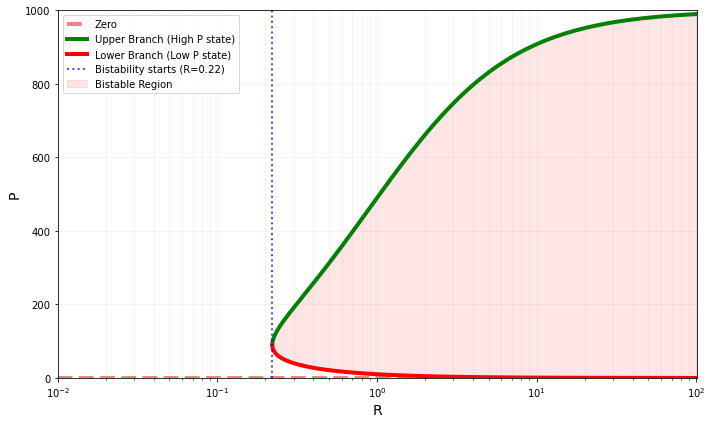

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Symbolic variables
var('DU DP2 DP2R P')

D = 10
kplus = 100
kminus = 100
alpha = 100
gamma = 1
ktwoplus = 0.1
ktwominus = 1000

# coefficients
# print("  b(R) = -(alpha/gamma)*D*R / (R + kminus/kplus)")
# print("  c(R) = (kminus*ktwominus)/(kplus*ktwoplus) / (R + kminus/kplus)")

c1 = kminus/kplus
c2 = (kminus*ktwominus)/(kplus*ktwoplus)

print(f"\n  c1 = kminus/kplus = {c1}")
print(f"  c2 = (kminus*ktwominus)/(kplus*ktwoplus) = {c2}")


# Numerical Soln. 

print("Computing Hysteresis Curves")

Rp_values = np.logspace(-2, 2, 10000)

# Calculating quadratic coefficients
b = -(alpha/gamma)*D*Rp_values / (Rp_values + c1)
c = c2 / (Rp_values + c1)

# Calculating discriminant
discriminant = b**2 - 4*c

print(f"\nDiscriminant range: [{np.min(discriminant):.2f}, {np.max(discriminant):.2f}]")

# Finding where discriminant becomes positive
positive_mask = discriminant > 0
if np.any(positive_mask):
    first_positive = np.argmax(positive_mask)
    R_bistable_start = Rp_values[first_positive]
    print(f"Bistability begins at R = {R_bistable_start:.4f}")
    print(f"Number of bistable points: {np.sum(positive_mask)}")
    
    # Extracting the bistable region
    Rp_bistable = Rp_values[first_positive:]
    b_bistable = b[first_positive:]
    c_bistable = c[first_positive:]
    disc_bistable = discriminant[first_positive:]
    
    # Two solutions from quadratic formula
    # Upper branch
    P1 = (-b_bistable + np.sqrt(disc_bistable)) / 2 
    # Lower branch
    P2 = (-b_bistable - np.sqrt(disc_bistable)) / 2  
    
    print(f"\nUpper branch P1: min={np.min(P1):.2f}, max={np.max(P1):.2f}")
    print(f"Lower branch P2: min={np.min(P2):.2f}, max={np.max(P2):.2f}")
else:
    print("WARNING: No bistable region found!")
    Rp_bistable = np.array([])
    P1 = np.array([])
    P2 = np.array([])

# VERIFICATION WITH GROEBNER BASIS (for sample inputs considered)


# # Test at a few points in bistable region
# if len(Rp_bistable) > 0:
#     sample_indices = [len(Rp_bistable)//4, len(Rp_bistable)//2, 3*len(Rp_bistable)//4]
    
#     for idx in sample_indices:
#         if idx >= len(Rp_bistable):
#             continue
            
#         Rp_val = Rp_bistable[idx]
#         P1_expected = P1[idx]
#         P2_expected = P2[idx]
        
#         # Polynomial ring for Groebner basis
#         R_ring = PolynomialRing(QQ, 'DU,DP2,DP2R,P', order='lex')
#         DU_R, DP2_R, DP2R_R, P_R = R_ring.gens()
        
#         # Define equations
#         f1 = DU_R + DP2_R + DP2R_R - D
#         f2 = kplus*P_R**2*DU_R - kminus*DP2_R
#         f3 = ktwoplus*Rp_val*DP2_R - ktwominus*DP2R_R
#         f4 = alpha*DP2R_R - gamma*P_R
        
#         # Compute Groebner basis
#         I = R_ring.ideal([f1, f2, f3, f4])
#         G = I.groebner_basis()
        
#         # Convert and solve
#         groebner_eqns = [SR(poly) for poly in G]
#         sol = solve(groebner_eqns, DU, DP2, DP2R, P, solution_dict=True)
        
#         print(f"\nRp = {Rp_val:.4f}:")
#         print(f"  Expected: P1={P1_expected:.4f}, P2={P2_expected:.4f}")
        
#         # Extract P values from solutions
#         P_values_found = []
#         for s in sol:
#             try:
#                 val_P = float(s[P].n()) if hasattr(s[P], 'n') else float(s[P])
#                 if val_P > 0:  # Only positive solutions
#                     P_values_found.append(val_P)
#             except:
#                 continue
        
#         P_values_found.sort()
#         if len(P_values_found) >= 2:
#             print(f"  GB found: P1={P_values_found[-1]:.4f}, P2={P_values_found[0]:.4f}")
#             print(f"  Difference: ΔP1={abs(P_values_found[-1]-P1_expected):.4f}, ΔP2={abs(P_values_found[0]-P2_expected):.4f}")
#         else:
#             print(f"  GB found: {len(P_values_found)} positive solutions")


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Zero line
P_zero = np.zeros_like(Rp_values)
ax.plot(Rp_values, P_zero, linewidth=4, color='red', linestyle='--', alpha=0.5, label='Zero')

# Plotting hysteresis branches
if len(Rp_bistable) > 0:
    ax.plot(Rp_bistable, P1, linewidth=4, color='green', label='Upper Branch (High P state)')
    ax.plot(Rp_bistable, P2, linewidth=4, color='red', label='Lower Branch (Low P state)')
    
# Marking bistability region
    ax.axvline(R_bistable_start, color='blue', linestyle=':', linewidth=2, 
               alpha=0.7, label=f'Bistability starts (R={R_bistable_start:.2f})')
    
# Adding shaded region for showing bistability
    ax.fill_between(Rp_bistable, P2, P1, alpha=0.1, color='red', label='Bistable Region')

ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(0, 1000)
ax.set_xlabel('R', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.grid(True, which="both", lw=0.5, alpha=0.3)
ax.legend(fontsize=10, loc='upper left')
# ax.set_title('Hysteresis: Bistable Response with Two Stable States', fontsize=14)
plt.tight_layout()
# plt.show()
plt.savefig('H.png', dpi=600, bbox_inches='tight')

STH Heirarchy

Parameters:
  D = 10, alpha = 100, gamma = 1
  kplus = 100, kminus = 100
  ktwoplus = 0.100000000000000, ktwominus = 1000

Derived constants:
  c1 (Kd1) = kminus/kplus = 1
  c2 (Kd1*Kd2) = (kminus*ktwominus)/(kplus*ktwoplus) = 10000.0000000000
  Max P (saturation) = (alpha/gamma)*D = 1000
P = (alpha/gamma) * D * R / (R + Kd)
  At R=0.01: P = 9.9010
  At R=1: P = 499.8849
  At R=100: P = 990.0990
Formula: P = [(alpha/gamma)*D*R - c2] / (R + c1)
Threshold at R = 10.0000
  At R=0.01: P = -9891.0891 (negative, no production)
  At R=10.0000: P = 0 (threshold crossing)
  At R=100: P = 891.0891
Quadratic: P^2 + b(R)*P + c(R) = 0
  b(R) = -(alpha/gamma)*D*R / (R + c1)
  c(R) = c2 / (R + c1)

Bistability begins at R = 0.2211

At R=100:
  Upper branch: P1 = 989.9990
  Lower branch: P2 = 0.1000


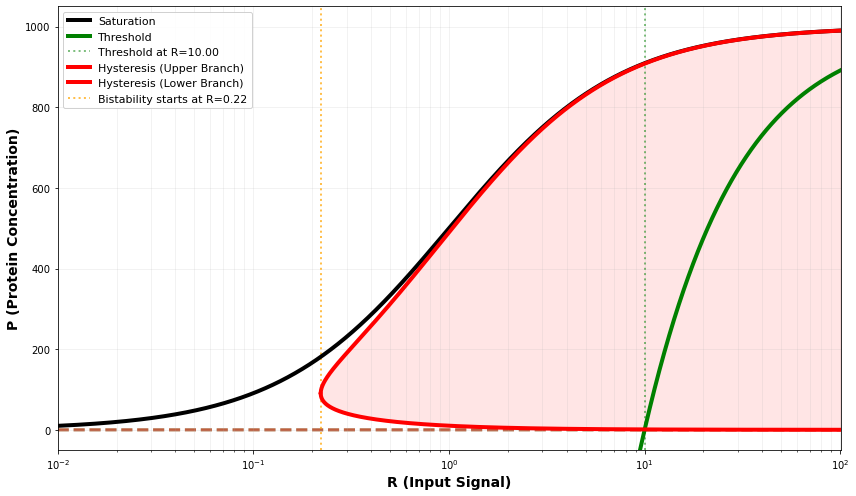

In [45]:
import numpy as np
import matplotlib.pyplot as plt

saturation = True
threshold = True
hysteresis = True

D = 10          
alpha = 100     
gamma = 1       
kplus = 100     
kminus = 100    
ktwoplus = 0.1      
ktwominus = 1000    

# Derived constants
c1 = kminus/kplus                        # Kd1 = 1
c2 = (kminus*ktwominus)/(kplus*ktwoplus) # Kd1*Kd2 = 10,000

print("STH Heirarchy")
print(f"\nParameters:")
print(f"  D = {D}, alpha = {alpha}, gamma = {gamma}")
print(f"  kplus = {kplus}, kminus = {kminus}")
print(f"  ktwoplus = {ktwoplus}, ktwominus = {ktwominus}")
print(f"\nDerived constants:")
print(f"  c1 (Kd1) = kminus/kplus = {c1}")
print(f"  c2 (Kd1*Kd2) = (kminus*ktwominus)/(kplus*ktwoplus) = {c2}")
print(f"  Max P (saturation) = (alpha/gamma)*D = {(alpha/gamma)*D}")

Rp_values = np.logspace(-2, 2, 10000)  # R from 0.01 to 100


# Saturation

P_saturation = None
if saturation:
    
    # Equations:
    # f1 = DU + DP - D
    # f2 = kplus*R*DU - kminus*DP
    # f3 = alpha*DP - gamma*P
    
    # Analytical solution:
    P_saturation = (alpha/gamma) * D * Rp_values / (Rp_values + kminus/kplus)
    
    print(f"P = (alpha/gamma) * D * R / (R + Kd)")
    print(f"  At R=0.01: P = {P_saturation[0]:.4f}")
    print(f"  At R={c1}: P = {P_saturation[np.argmin(np.abs(Rp_values - c1))]:.4f}")
    print(f"  At R=100: P = {P_saturation[-1]:.4f}")


# THRESHOLD 

P_threshold = None
if threshold:
    
    # Equations:
    # f1 = x1 + x2 + x3 - D
    # f2 = kplus*x4*x1 - kminus*x2
    # f3 = ktwoplus*R*x2 - ktwominus*x3
    # f4 = alpha*x3 - gamma*x4
    
    # Analytical solution:
    P_threshold = ((alpha/gamma)*D*Rp_values - (kminus*ktwominus)/(kplus*ktwoplus)) / (Rp_values + kminus/kplus)
    
    # Calculate threshold crossing point
    R_threshold = (kminus*ktwominus)/(kplus*ktwoplus) / ((alpha/gamma)*D)
    
    print(f"Formula: P = [(alpha/gamma)*D*R - c2] / (R + c1)")
    print(f"Threshold at R = {R_threshold:.4f}")
    print(f"  At R=0.01: P = {P_threshold[0]:.4f} (negative, no production)")
    print(f"  At R={R_threshold:.4f}: P = 0 (threshold crossing)")
    print(f"  At R=100: P = {P_threshold[-1]:.4f}")


# Hysteresis

P1_hysteresis = None
P2_hysteresis = None
Rp_bistable = None
R_bistable_start = None

if hysteresis:
    
    # Equations:
    # f1 = DU + DP2 + DP2R - D
    # f2 = kplus*P^2*DU - kminus*DP2
    # f3 = ktwoplus*R*DP2 - ktwominus*DP2R
    # f4 = alpha*DP2R - gamma*P
# This reduces to quadratic: P^2 + b(R)*P + c(R) = 0
    
    # Coefficients
    b = -(alpha/gamma) * D * Rp_values / (Rp_values + c1)
    c = c2 / (Rp_values + c1)
    
    discriminant = b**2 - 4*c
    
    # Finding bistable region (d>0)
    positive_mask = discriminant > 0
    
    if np.any(positive_mask):
        first_positive = np.argmax(positive_mask)
        R_bistable_start = Rp_values[first_positive]
        
    # Extracting bistable region
        Rp_bistable = Rp_values[first_positive:]
        b_bistable = b[first_positive:]
        c_bistable = c[first_positive:]
        disc_bistable = discriminant[first_positive:]
        
    # Two solutions (quadratic formula)
        P1_hysteresis = (-b_bistable + np.sqrt(disc_bistable)) / 2  # Upper branch
        P2_hysteresis = (-b_bistable - np.sqrt(disc_bistable)) / 2  # Lower branch
        
        print(f"Quadratic: P^2 + b(R)*P + c(R) = 0")
        print(f"  b(R) = -(alpha/gamma)*D*R / (R + c1)")
        print(f"  c(R) = c2 / (R + c1)")
        print(f"\nBistability begins at R = {R_bistable_start:.4f}")
#         print(f"Number of bistable points: {len(Rp_bistable)}")
        print(f"\nAt R=100:")
        print(f"  Upper branch: P1 = {P1_hysteresis[-1]:.4f}")
        print(f"  Lower branch: P2 = {P2_hysteresis[-1]:.4f}")
    else:
        print("No bistable region found!")


# Plotting

fig, ax = plt.subplots(figsize=(12, 7))

# Plot zero line (for reference)
P_zero = np.zeros_like(Rp_values)

if saturation and P_saturation is not None:
    ax.plot(Rp_values, P_saturation, linewidth=4, color='black', 
            label='Saturation', zorder=3)

if threshold and P_threshold is not None:
    ax.plot(Rp_values, P_zero, linewidth=3, color='green', 
            linestyle='--', alpha=0.5, zorder=1)
    ax.plot(Rp_values, P_threshold, linewidth=4, color='green', 
            label='Threshold', zorder=2)
    
# Marking threshold crossing
    if R_threshold > 0:
        ax.axvline(R_threshold, color='green', linestyle=':', linewidth=2, 
                   alpha=0.5, label=f'Threshold at R={R_threshold:.2f}')

if hysteresis and P1_hysteresis is not None and P2_hysteresis is not None:
    ax.plot(Rp_values, P_zero, linewidth=3, color='red', 
            linestyle='--', alpha=0.5, zorder=1)
    ax.plot(Rp_bistable, P1_hysteresis, linewidth=4, color='red', 
            label='Hysteresis (Upper Branch)', zorder=4)
    ax.plot(Rp_bistable, P2_hysteresis, linewidth=4, color='red', 
            label='Hysteresis (Lower Branch)', zorder=4, linestyle='-')
    
# Shading bistable region
    ax.fill_between(Rp_bistable, P2_hysteresis, P1_hysteresis, 
                    alpha=0.1, color='red', zorder=0)
    
    # Marking bistability onset
    if R_bistable_start is not None:
        ax.axvline(R_bistable_start, color='orange', linestyle=':', 
                   linewidth=2, alpha=0.7, 
                   label=f'Bistability starts at R={R_bistable_start:.2f}')

ax.set_xscale('log')
ax.set_xlim(0.01, 101)
ax.set_ylim(-50, 1050)
ax.set_xlabel('R (Input Signal)', fontsize=14, fontweight='bold')
ax.set_ylabel('P (Protein Concentration)', fontsize=14, fontweight='bold')
ax.grid(True, which="both", lw=0.5, alpha=0.3)
ax.legend(fontsize=11, loc='upper left', framealpha=0.9)

plt.tight_layout()
plt.show()

